<h1>EDA on DPF failure</h1>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Load vehicle list
vehicles = pd.read_csv('vehicle_list.csv')

vehicles.head(10)

,fleet,truck_number,platform_id,vehicle_year,vehicle_make,vehicle_model,date_of_service,dpf_failure
0,Conway,432 3619,309450,2014,Freightliner,Cascadia,1/4/2019,Yes
1,Conway,432 3577,308374,2014,Freightliner,Cascadia,1/9/2019,Yes
2,Conway,426 6337,10315963,2013,Freightliner,Cascadia,1/17/2019,Yes
3,Conway,532 4279,10314364,2014,Freightliner,Cascadia,1/28/2019,Yes
4,Conway,432 3754,307112,2014,Freightliner,Cascadia,2/13/2019,Yes
5,Conway,532 5458,10312983,2015,Freightliner,Cascadia,3/16/2019,Yes
6,Conway,432 3874,308049,2014,Freightliner,Cascadia,3/19/2019,Yes
7,Conway,632 3472,310201,2013,Freightliner,Cascadia,4/9/2019,Yes
8,Conway,432 3721,303576,2014,Freightliner,Cascadia,4/17/2019,Yes
9,Conway,432 2497,302332,2012,Freightliner,Cascadia,4/20/2019,Yes


In [48]:
# How many with and without failures?

vehicles.groupby('dpf_failure').size()

dpf_failure
No     69
Yes    92
dtype: int64

In [49]:
# list of truck id with/without dpf_failure:
dpf_normal = []
dpf_failure = []

for i, e in vehicles.iterrows():
    if(e.dpf_failure == 'No'):
        dpf_failure.append(e.platform_id)
    else:
        dpf_normal.append(e.platform_id)
len(dpf_normal)

92

In [50]:
# Single vehicle data
i = 6

df = pd.read_csv('./individual_files/{}_daily_data.csv'.format(vehicles.iloc[i].platform_id))

# delete index column 'Unnamed: 0'
del df['Unnamed: 0']

# set date column to datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# show
df.head(10)

,date,platform_id,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,dpf_regen_not_active_duration_mins,dpf_regen_active_duration_mins,dpf_regen_needed_duration_mins,dpf_regen_inhibit_switch_not_active_duration_mins,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes
0,2019-01-02,308049,217.980949,37.871273,434.233650,145.732117,1.917883,324.759733,77.856433,402.616167,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
1,2019-01-03,308049,773.847198,120.327110,798.010167,61.251200,4.020485,744.067367,43.865600,787.932967,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
2,2019-01-04,308049,987.012162,146.885554,1063.576433,126.815250,4.584875,976.207150,81.953617,1058.160767,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
3,2019-01-05,308049,555.012699,78.064392,657.412083,109.742633,2.245548,569.853783,81.322317,651.176100,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
4,2019-01-06,308049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,[]
5,2019-01-07,308049,552.313111,85.182049,596.943433,63.351617,2.182047,553.257400,38.903300,592.160700,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
6,2019-01-08,308049,635.044902,105.418840,762.614933,110.477700,2.567051,680.182633,70.103517,750.286150,0.0,0.0,0.0,0.0,0,[]
7,2019-01-09,308049,1000.624575,166.671142,1067.535033,124.423983,4.615095,969.475567,89.207417,1058.682983,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
8,2019-01-10,308049,991.828496,151.898811,1052.645983,87.423500,3.657309,993.279783,40.702633,1033.982417,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
9,2019-01-11,308049,445.588162,69.978499,536.782850,108.373433,1.878210,483.303467,51.536533,534.840000,0.0,0.0,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."


In [51]:
df.shape

(729, 16)

# Load All Data

In [52]:
# create empty dataframe
all_data = pd.DataFrame()

for i, e in vehicles.iterrows():
    try:
        tmp = pd.read_csv('./individual_files/{}_daily_data.csv'.format(e.platform_id))
        if len(all_data) == 0:  # first csv read replaces empty dataframe
            all_data = tmp
        else:  # all other csv reads append to dataframe
            all_data = all_data.append(tmp)
    except:

        None
    
    
# delete index column 'Unnamed: 0'
del all_data['Unnamed: 0']

# set date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'], infer_datetime_format=True)

# show
all_data.head(10)

,date,platform_id,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,dpf_regen_not_active_duration_mins,dpf_regen_active_duration_mins,dpf_regen_needed_duration_mins,dpf_regen_inhibit_switch_not_active_duration_mins,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes
0,2019-01-02,309450,65.294602,7.743177,222.002017,44.141633,0.057875,145.853650,8.650900,154.504550,0.000000,0.000000,0.0,0.0,0,[]
1,2019-01-03,309450,210.269609,32.266755,519.221017,134.957617,0.495596,293.039250,51.976683,345.015933,0.000000,0.000000,0.0,0.0,0,[]
2,2019-01-04,309450,98.413486,15.543700,354.276533,83.660883,0.281884,115.026133,31.087450,41.469600,57.857333,46.786650,0.0,0.0,1,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
3,2019-01-05,309450,74.838556,13.602637,131.153333,30.391967,0.225600,111.522417,15.201283,0.000000,123.756800,2.966900,0.0,0.0,0,[]
4,2019-01-06,309450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,[]
5,2019-01-07,309450,76.971727,9.796143,239.696350,56.132617,0.045396,167.630117,9.350683,15.101417,136.727683,25.151700,0.0,0.0,0,[]
6,2019-01-08,309450,387.613434,65.370074,817.106383,199.210217,3.029140,648.970533,61.438967,710.409500,0.000000,0.000000,0.0,0.0,0,[]
7,2019-01-09,309450,506.462963,82.666647,1019.611867,223.357117,3.438220,847.347133,76.273083,923.620217,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
8,2019-01-10,309450,396.553529,65.532907,793.768050,177.884983,2.316437,599.359300,62.795867,662.155167,0.000000,0.000000,0.0,0.0,0,[]
9,2019-01-11,309450,433.965149,70.310565,930.651567,203.305017,2.605587,805.682267,71.739567,683.756067,129.727000,63.938767,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."


pandas.core.indexes.base.Index

In [60]:
color = ['blue','red','green','black','grey','purple','cyan','magenta','olive','pink','orange','bisque','red','red']
len(color)

14

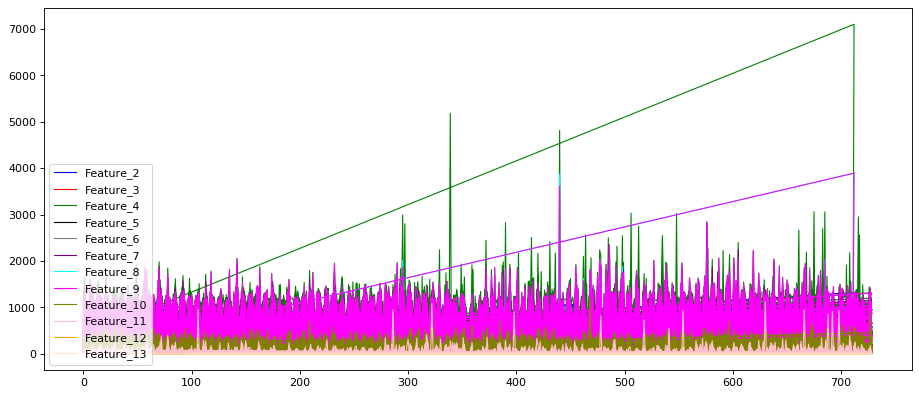

In [65]:
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
feats = all_data.columns.tolist()

for i in range (2,len(feats)-2):
    ax.plot(all_data[feats[i]],label="Feature_{}".format(i),color=color[i-2], animated=True, linewidth=1)
plt.legend(loc='lower left')
plt.show()
    

In [33]:
# Check null
all_data.isna().sum()

date                                                 0
platform_id                                          0
distance_miles                                       0
fuel_used_gallons                                    0
duration_mins                                        0
idle_duration_mins                                   0
fuel_loss_gallons                                    0
dpf_regen_inhibited_duration_mins                    0
dpf_regen_not_inhibited_duration_mins                0
dpf_regen_not_active_duration_mins                   0
dpf_regen_active_duration_mins                       0
dpf_regen_needed_duration_mins                       0
dpf_regen_inhibit_switch_not_active_duration_mins    0
dpf_regen_inhibit_switch_active_duration_mins        0
vehicle_serviced                                     0
diagnostics_trouble_codes                            0
dtype: int64

/Users/emma/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


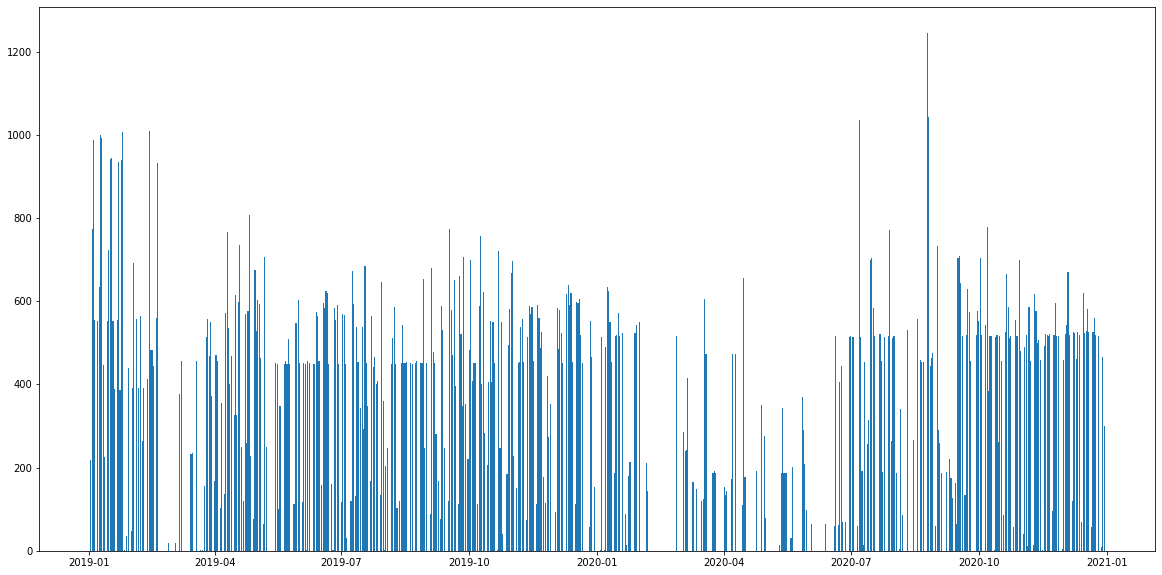

In [7]:
# look at daily miles

plt.figure(figsize=(20, 10))
x = df['date']
y = df['distance_miles']
plt.bar(x, y)
plt.show()

# Examine metrics and distributions:

In [12]:
# Load all metrics

frames = []

for i, e in vehicles.iterrows():
    try:
        tmp = pd.read_csv('./individual_files/{}_daily_data.csv'.format(e.platform_id))
        
        del tmp['Unnamed: 0']
        tmp_des = tmp.describe()
        frames.append(tmp_des)
    except:
        None
all_metrics = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist())  

In [13]:
all_metrics.head()

platform_id  distance_miles  fuel_used_gallons  duration_mins  \
309450 count        729.0      729.000000         729.000000     729.000000   
       mean      309450.0      142.993855          20.002198     309.767090   
       std            0.0      117.379793          16.434376     227.364679   
       min       309450.0        0.000000           0.000000       0.000000   
       25%       309450.0       20.019728           2.809523      77.224150   

              idle_duration_mins  fuel_loss_gallons  \
309450 count          729.000000         729.000000   
       mean            57.827225           0.282977   
       std             43.731408           0.434231   
       min              0.000000           0.000000   
       25%             17.907733           0.050565   

              dpf_regen_inhibited_duration_mins  \
309450 count                         729.000000   
       mean                          263.443552   
       std                           196.024678   
       min                             0.000000   
       25%                            50.062917   

              dpf_regen_not_inhibited_duration_mins  \
309450 count                             729.000000   
       mean                               21.215931   
       std                                20.724956   
       min                                 0.000000   
       25%                                 3.162417   

              dpf_regen_not_active_duration_mins  \
309450 count                          729.000000   
       mean                           240.117821   
       std                            205.558831   
       min                              0.000000   
       25%                              0.000000   

              dpf_regen_active_duration_mins  dpf_regen_needed_duration_mins  \
309450 count                      729.000000                      729.000000   
       mean                        39.271693                        5.269969   
       std                         88.844278                       17.269143   
       min                          0.000000                        0.000000   
       25%                          0.000000                        0.000000   

              dpf_regen_inhibit_switch_not_active_duration_mins  \
309450 count                                              729.0   
       mean                                                 0.0   
       std                                                  0.0   
       min                                                  0.0   
       25%                                                  0.0   

              dpf_regen_inhibit_switch_active_duration_mins  vehicle_serviced  
309450 count                                          729.0        729.000000  
       mean                                             0.0          0.001372  
       std                                              0.0          0.037037  
       min                                              0.0          0.000000  
       25%                                              0.0          0.000000

In [14]:
all_metrics.columns.tolist()

['platform_id',
 'distance_miles',
 'fuel_used_gallons',
 'duration_mins',
 'idle_duration_mins',
 'fuel_loss_gallons',
 'dpf_regen_inhibited_duration_mins',
 'dpf_regen_not_inhibited_duration_mins',
 'dpf_regen_not_active_duration_mins',
 'dpf_regen_active_duration_mins',
 'dpf_regen_needed_duration_mins',
 'dpf_regen_inhibit_switch_not_active_duration_mins',
 'dpf_regen_inhibit_switch_active_duration_mins',
 'vehicle_serviced']

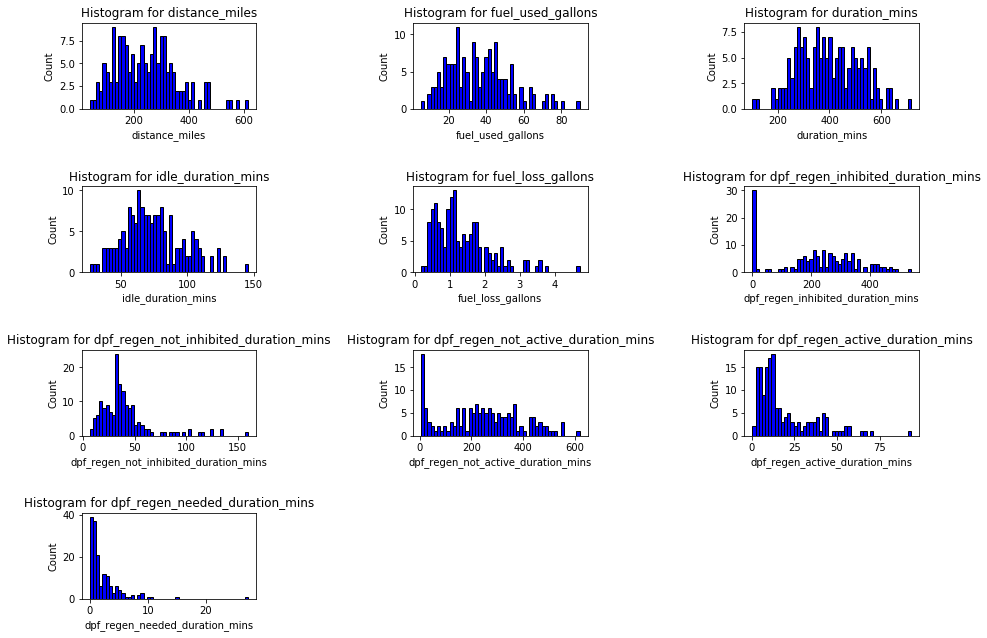

In [21]:
# Histograms of mean
k = 1

histograms_mean = plt.figure(figsize=(15,10))

for i in all_metrics.columns.tolist()[1:11]:
    
    # Draw the plot
    hist = histograms_mean.add_subplot(4,3,k)
    k += 1

    hist.hist(all_metrics.loc(axis=0)[:, 'mean'][i], bins = 50, edgecolor = 'black', color = 'blue')
    
    # Title and labels
    hist.set_title('Histogram for {}'.format(i))
    hist.set_xlabel(i)
    hist.set_ylabel('Count')

    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.9)

plt.show()


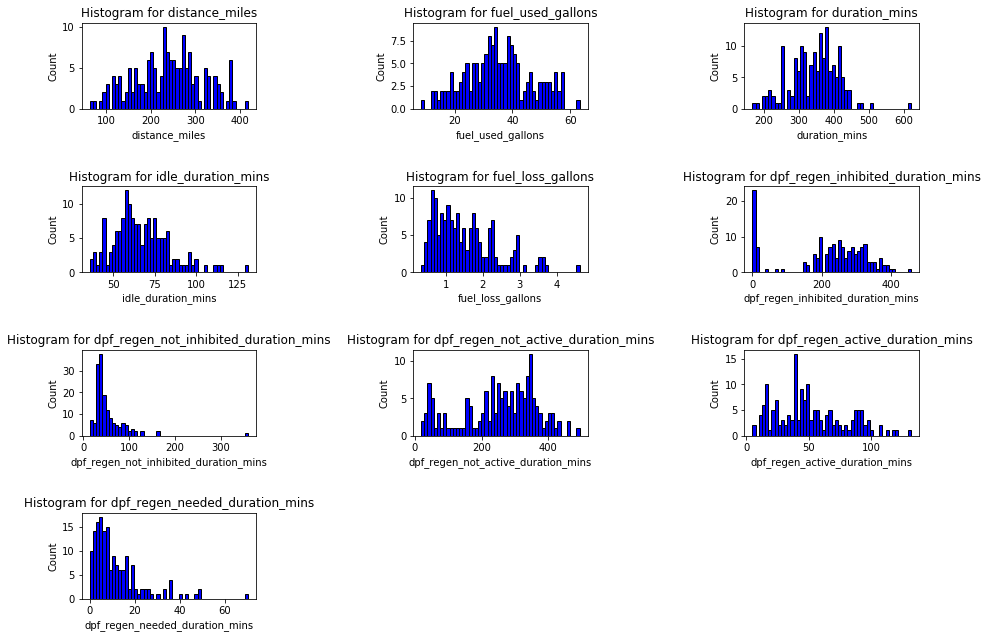

In [22]:
# Histograms of std
k = 1

histograms_std = plt.figure(figsize=(15,10))

for i in all_metrics.columns.tolist()[1:11]:
    
    # Draw the plot
    hist = histograms_std.add_subplot(4,3,k)
    k += 1

    hist.hist(all_metrics.loc(axis=0)[:, 'std'][i], bins = 50, edgecolor = 'black', color = 'blue')
    
    # Title and labels
    hist.set_title('Histogram for {}'.format(i))
    hist.set_xlabel(i)
    hist.set_ylabel('Count')

    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.9)

plt.show()



In [17]:
# Separate into dpf normal and failure set
dpf_normal_metrics = all_metrics.loc[dpf_normal]
dpf_failure_metrics = all_metrics.loc[dpf_failure]

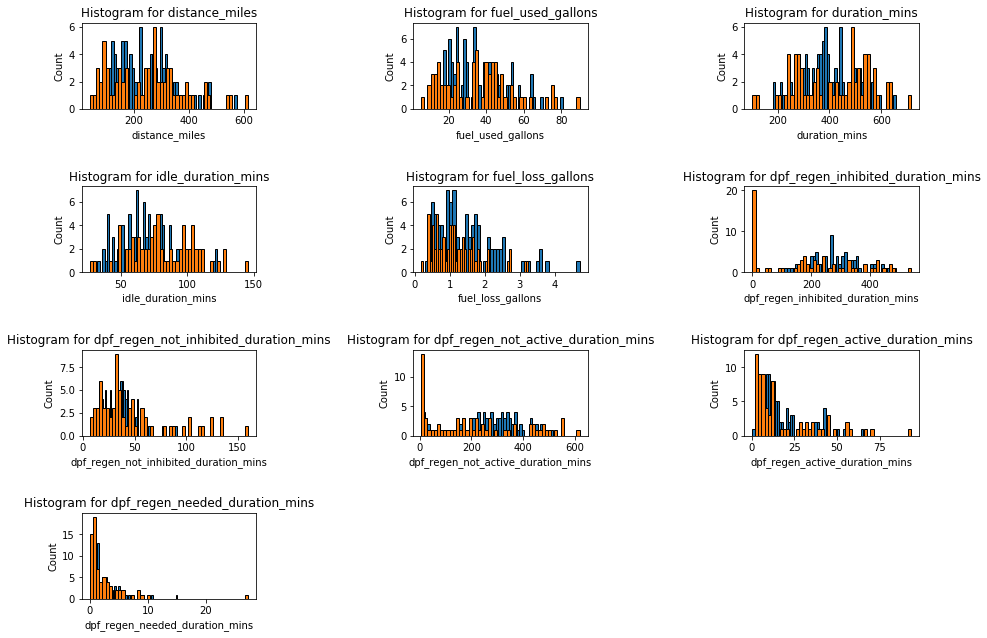

In [23]:
# Distribution: normal vs failure
k = 1

histograms2 = plt.figure(figsize=(15,10))

for i in all_metrics.columns.tolist()[1:11]:
    
    # Draw the plot
    hist = histograms2.add_subplot(4,3,k)
    k += 1

    hist.hist(dpf_normal_metrics.loc(axis=0)[:, 'mean'][i], bins = 50, edgecolor = 'black', label = 'normal')
    hist.hist(dpf_failure_metrics.loc(axis=0)[:, 'mean'][i], bins = 50, edgecolor = 'black', label = 'failure')
    
    # Title and labels
    hist.set_title('Histogram for {}'.format(i))
    hist.set_xlabel(i)
    hist.set_ylabel('Count')

    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.9)

plt.show()



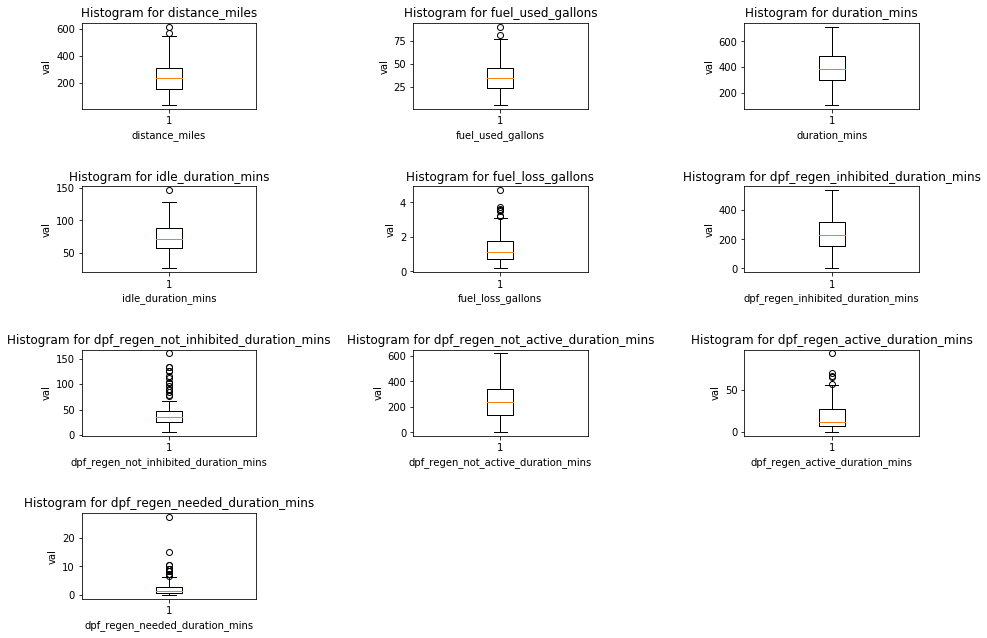

In [30]:
# Boxplot: normal vs failure
k = 1

boxplots = plt.figure(figsize=(15,10))

for i in all_metrics.columns.tolist()[1:11]:
    
    # Draw the plot
    box = boxplots.add_subplot(4,3,k)
    k += 1

    box.boxplot(all_metrics.loc(axis=0)[:, 'mean'][i])
    
    # Title and labels
    box.set_title('Histogram for {}'.format(i))
    box.set_xlabel(i)
    box.set_ylabel('val')

    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.9)

plt.show()




Text(0, 0.5, 'dpf_regen_not_inhibited_duration_mins')

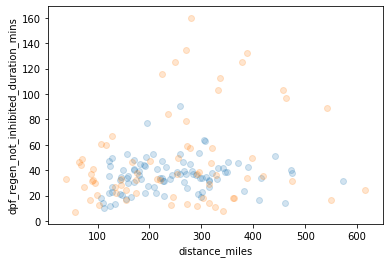

In [230]:
# scatterplot describing the difference between dpf_failure and dpf_normal cars on two features

i = 'distance_miles'
j = 'dpf_regen_not_inhibited_duration_mins'
plt.scatter(dpf_normal_metrics.loc(axis=0)[:, 'mean'][i], dpf_normal_metrics.loc(axis=0)[:, 'mean'][j], alpha=0.2, c='#1f77b4', cmap='viridis')
plt.scatter(dpf_failure_metrics.loc(axis=0)[:, 'mean'][i], dpf_failure_metrics.loc(axis=0)[:, 'mean'][j], alpha=0.2, c='#ff7f0e', cmap='viridis')

plt.xlabel(i)
plt.ylabel(j)